# DBSCAN

`dbscan 파라미터 : eps=0.03,min_samples=5,leaf_size=10,metric='chebyshev'
거리계산법: 체비셰프 (두 데이터 포인트 간의 각 차원에서의 최대 차이를 계산)`

## 패키지 참조

In [58]:
from pandas import DataFrame,read_csv,read_excel,merge,melt,pivot_table
import numpy
from matplotlib import pyplot as plt
import seaborn as sb
import sys
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from factor_analyzer.factor_analyzer import calculate_kmo

## 폰트세팅

In [59]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.unicode_minus"] = False

## 데이터

In [60]:
origin=read_excel('행정동병합최종(반포본동).xlsx')
origin.head(2)

,시도명,시군구코드,시군구명,행정동코드,행정동코드_수정,읍면동명,생성일자,말소일자,지하철역_수,의료기관_수,...,세대당공원면적minmax,수변점수,행정동별버스정류장수,행정동별유통업체수,공공자전거대여소수,인구밀도,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax,환경자족성지수minmax
0,서울특별시,11110,종로구,1111051500,11110515,청운효자동,20081101,0,0,11,...,0.352898,0,32,0,3,4552.529183,0.002648,0.068435,0.114798,0.212495
1,서울특별시,11110,종로구,1111053000,11110530,사직동,19880423,0,2,75,...,0.063554,0,27,0,12,7611.382114,0.006464,0.041923,0.333275,0.038269


### 분석에 필요한 변수만 추출

`읍면동`, `지수` 추출

In [61]:
origin1=origin.filter(['읍면동명','환경자족성지수minmax','여가생활지수minmax','사회적약자_지원_인프라_밀집도minmax','접근성지수minmax'])
origin1.head(2)

,읍면동명,환경자족성지수minmax,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax
0,청운효자동,0.212495,0.002648,0.068435,0.114798
1,사직동,0.038269,0.006464,0.041923,0.333275


### 이상치/결측치 확인 및 처리

In [62]:
origin1.isna().sum()

읍면동명                      0
환경자족성지수minmax             0
여가생활지수minmax              1
사회적약자_지원_인프라_밀집도minmax    0
접근성지수minmax               0
dtype: int64

In [63]:
origin2=origin1.copy()
origin2=origin1.fillna(0)
origin2.isna().sum()

읍면동명                      0
환경자족성지수minmax             0
여가생활지수minmax              0
사회적약자_지원_인프라_밀집도minmax    0
접근성지수minmax               0
dtype: int64

In [64]:
origin2.head(2)

,읍면동명,환경자족성지수minmax,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax
0,청운효자동,0.212495,0.002648,0.068435,0.114798
1,사직동,0.038269,0.006464,0.041923,0.333275


## #1. `환경자족성지수 - 여가생활지수`

### 변수 추출

In [65]:
origin2.head()

,읍면동명,환경자족성지수minmax,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax
0,청운효자동,0.212495,0.002648,0.068435,0.114798
1,사직동,0.038269,0.006464,0.041923,0.333275
2,삼청동,0.602143,0.005332,0.090426,0.342620
3,부암동,0.602143,0.001699,0.067935,0.157400
4,평창동,0.602861,0.000529,0.073234,0.135935


In [66]:
origin3=origin2.copy()
X = origin3.iloc[:,[1,2]].values # x값으로 환경자족성지수,여가생활지수 지정
X[:5]

array([[2.12494728e-01, 2.64751750e-03],
       [3.82685661e-02, 6.46393211e-03],
       [6.02142889e-01, 5.33216587e-03],
       [6.02142889e-01, 1.69869928e-03],
       [6.02860542e-01, 5.28773115e-04]])

### DBSCAN 모델 구축

DBSCAN 구현 파라미터

| 파라미터 | 설명 |
| -- | -- |
| `eps` | 하나의 샘플에 대한 다른 샘플과의 최대 거리 |
| `min_samples` | MinPts. 핵심 포인트로 간주할 포인트에 대한 이웃의 샘플 수 |

In [67]:
dbscan=DBSCAN(eps=0.03,min_samples=5,leaf_size=10,metric='chebyshev')
dbscan.fit(X)

DBSCAN(eps=0.03, leaf_size=10, metric='chebyshev')

### 군집 결과

In [68]:
cluster_label=dbscan.labels_
cluster_label

array([ 0,  1,  2,  2,  2,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  3,  2,
        1, -1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  0,  1, -1,  1,  1,  1,
        1,  1,  1,  2,  1,  4,  2,  2,  2, -1,  1,  2,  2,  2,  0,  2,  2,
        2,  2, -1,  2,  5,  1,  2,  2,  2,  2,  2,  2,  2,  2,  5,  2,  2,
        4,  2,  0,  2,  3,  2,  2,  2,  6,  6,  2,  2,  2, -1,  3,  2,  2,
        2,  2,  2, -1,  2,  2,  2,  2,  2, -1,  2,  2,  2,  4,  3,  2,  3,
        2,  2,  2,  2,  4,  2,  2,  1,  1,  1,  1, -1,  2,  2,  1,  1,  1,
        1,  1,  2,  1,  2,  5,  5,  2,  2,  1,  4,  1,  1,  1,  2,  8,  2,
        1,  2,  2,  7,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  9,  2,  2,
        2,  2,  2,  3,  2,  0,  2, -1,  1, -1,  2,  2,  1,  2,  0,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  5,  2,  2,  2,  2,  2,  2,  1,  1,  1,
        7,  2,  2,  2,  3,  2,  8,  2,  2,  2,  2,  1,  1,  2,  2,  2,  6,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  8,  2,  2, -1,  1,  2,  1,  1,
        1,  1,  1,  1,  3

### 군집 결과 데이터 통합

In [69]:
origin3['cluster_id'] = cluster_label
origin3.head()

,읍면동명,환경자족성지수minmax,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax,cluster_id
0,청운효자동,0.212495,0.002648,0.068435,0.114798,0
1,사직동,0.038269,0.006464,0.041923,0.333275,1
2,삼청동,0.602143,0.005332,0.090426,0.342620,2
3,부암동,0.602143,0.001699,0.067935,0.157400,2
4,평창동,0.602861,0.000529,0.073234,0.135935,2


### 군집 결과 시각화

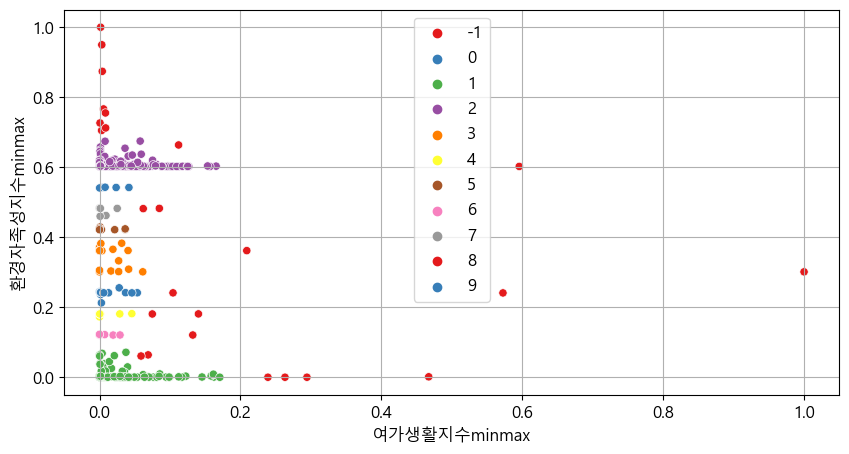

In [70]:
plt.figure(figsize=(10,5))
sb.scatterplot(data=origin3,x='여가생활지수minmax',y='환경자족성지수minmax',hue=cluster_label,palette='Set1')
plt.grid()
plt.show()
plt.close()

### 수동 voting을 위한 xlsx 파일 생성

In [71]:
origin3[origin3['cluster_id']==-1]
origin3_final=DataFrame(origin3[origin3['cluster_id']==-1])
origin3_final.head()

,읍면동명,환경자족성지수minmax,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax,cluster_id
8,종로1.2.3.4가동,0.063833,0.069040,0.206536,0.831703,-1
12,창신제1동,0.000000,0.263260,0.061943,0.161153,-1
18,회현동,0.000000,0.294433,0.155671,0.722658,-1
22,광희동,0.001183,0.467260,0.051345,0.358815,-1
24,신당동,0.301071,1.000000,0.031490,0.235243,-1


In [72]:
# origin3_final.to_excel('./교집합결과/여가생활,환경자족성지수voting2.xlsx')

## #2. `환경자족성지수 - 사회적약자지수`

### 변수 추출

In [73]:
origin2.head()

,읍면동명,환경자족성지수minmax,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax
0,청운효자동,0.212495,0.002648,0.068435,0.114798
1,사직동,0.038269,0.006464,0.041923,0.333275
2,삼청동,0.602143,0.005332,0.090426,0.342620
3,부암동,0.602143,0.001699,0.067935,0.157400
4,평창동,0.602861,0.000529,0.073234,0.135935


In [74]:
origin4=origin2.copy()
Y = origin4.iloc[:,[1,3]].values # x값으로 환경자족성지수,사회적약자지수 지정
Y[:5]

array([[0.21249473, 0.06843491],
       [0.03826857, 0.04192329],
       [0.60214289, 0.09042634],
       [0.60214289, 0.06793525],
       [0.60286054, 0.0732343 ]])

### DBSCAN 모델 구축

DBSCAN 구현 파라미터

| 파라미터 | 설명 |
| -- | -- |
| `eps` | 하나의 샘플에 대한 다른 샘플과의 최대 거리 |
| `min_samples` | MinPts. 핵심 포인트로 간주할 포인트에 대한 이웃의 샘플 수 |

In [75]:
dbscan1=DBSCAN(eps=0.03,min_samples=5,leaf_size=10,metric='chebyshev')
dbscan1.fit(Y)

DBSCAN(eps=0.03, leaf_size=10, metric='chebyshev')

### 군집 결과

In [76]:
cluster_label1=dbscan1.labels_
cluster_label1

array([ 0,  1,  2,  2,  2,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  3,  2,
       -1,  1, -1,  1,  1,  1, -1,  3,  1,  1,  1,  0,  1,  2,  1,  1,  1,
        1,  1,  1,  2,  1,  4,  2,  2,  2,  1,  1,  2,  2,  2,  0,  2,  2,
        2,  2,  3,  2,  5,  1,  2,  2,  2,  2,  2,  2,  2,  2,  5,  2,  2,
        4,  2,  0,  2,  3,  2,  2,  2,  6,  6,  2,  2,  2,  7,  3,  2,  2,
        2,  2,  2,  4,  2,  2,  2,  2,  2, -1,  2,  2,  2,  4,  3,  2,  3,
        2,  2,  2,  2,  4,  2,  2,  1,  1,  1,  1,  1,  2,  2,  1,  1,  1,
        1,  1,  2,  1,  2,  5,  5,  2,  2,  1,  4,  1,  1,  1,  2, -1,  2,
        1,  2,  2,  7,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  8,  2,  2,
        2,  2,  2,  3,  2,  0,  2, -1,  1, -1,  2,  2,  1,  2,  0,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  5,  2,  2,  2,  2,  2,  2,  1,  1,  1,
        7,  2,  2,  2,  3,  2, -1,  2,  2,  2,  2,  1,  1,  2,  2,  2,  6,
        2,  2,  2,  2,  2,  2,  2,  2,  2, -1,  2,  2,  6,  1,  2,  1,  1,
        1,  1,  1,  1,  3

### 군집 결과 데이터 통합

In [77]:
origin4['cluster_id'] = cluster_label1
origin4.head()

,읍면동명,환경자족성지수minmax,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax,cluster_id
0,청운효자동,0.212495,0.002648,0.068435,0.114798,0
1,사직동,0.038269,0.006464,0.041923,0.333275,1
2,삼청동,0.602143,0.005332,0.090426,0.342620,2
3,부암동,0.602143,0.001699,0.067935,0.157400,2
4,평창동,0.602861,0.000529,0.073234,0.135935,2


### 군집 결과 시각화

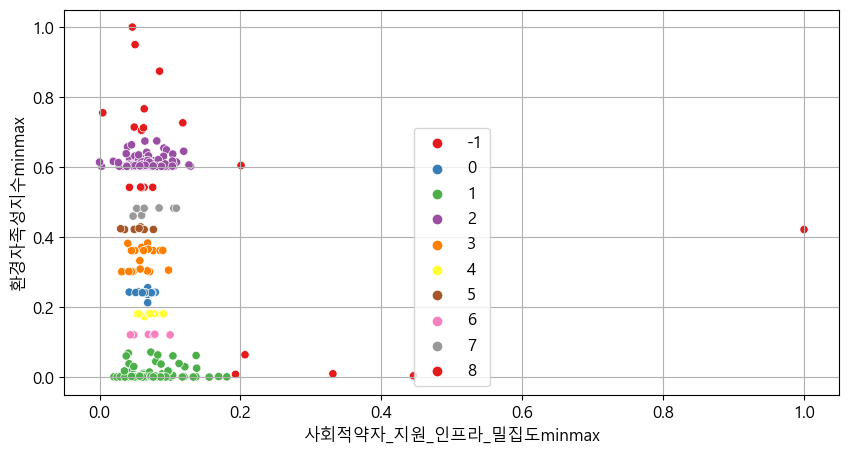

In [78]:
plt.figure(figsize=(10,5))
sb.scatterplot(data=origin4,x='사회적약자_지원_인프라_밀집도minmax',y='환경자족성지수minmax',hue=cluster_label1,palette='Set1')
plt.grid()
plt.show()
plt.close()

### 수동 voting을 위한 xlsx 파일 생성

In [79]:
origin4_final=DataFrame(origin4[origin4['cluster_id']==-1])
origin4_final.head()

,읍면동명,환경자족성지수minmax,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax,cluster_id
8,종로1.2.3.4가동,0.063833,0.069040,0.206536,0.831703,-1
17,소공동,0.009355,0.085553,0.331262,0.811509,-1
19,명동,0.003588,0.158472,0.445774,1.000000,-1
23,을지로동,0.007869,0.161512,0.193060,0.715484,-1
94,면목제4동,0.949815,0.003249,0.050509,0.074074,-1


In [80]:
# origin4_final.to_excel('./교집합결과/사회적약자,환경자족성지수voting2.xlsx')

## #.3 `환경자족성지수 - 접근성지수`

### 변수 추출

In [81]:
origin2.head()

,읍면동명,환경자족성지수minmax,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax
0,청운효자동,0.212495,0.002648,0.068435,0.114798
1,사직동,0.038269,0.006464,0.041923,0.333275
2,삼청동,0.602143,0.005332,0.090426,0.342620
3,부암동,0.602143,0.001699,0.067935,0.157400
4,평창동,0.602861,0.000529,0.073234,0.135935


In [82]:
origin5=origin2.copy()
Z = origin5.iloc[:,[1,4]].values # x값으로 환경자족성지수,접근성지수 지정
Z[:5]

array([[0.21249473, 0.11479751],
       [0.03826857, 0.33327467],
       [0.60214289, 0.34262014],
       [0.60214289, 0.15739974],
       [0.60286054, 0.13593454]])

### DBSCAN 모델 구축

DBSCAN 구현 파라미터

| 파라미터 | 설명 |
| -- | -- |
| `eps` | 하나의 샘플에 대한 다른 샘플과의 최대 거리 |
| `min_samples` | MinPts. 핵심 포인트로 간주할 포인트에 대한 이웃의 샘플 수 |

In [83]:
dbscan2=DBSCAN(eps=0.03,min_samples=5,leaf_size=10,metric='chebyshev')
dbscan2.fit(Z)

DBSCAN(eps=0.03, leaf_size=10, metric='chebyshev')

### 군집 결과

In [84]:
cluster_label2=dbscan2.labels_
cluster_label2

array([-1, -1, -1,  0,  0,  1,  1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  0,
       -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  2,  1,  0,  1,  1,  1,
       -1,  1,  1,  0,  1,  3, -1,  0,  0, -1,  1,  0,  0,  0,  2,  0,  0,
        0,  0,  4,  0,  5,  1,  0,  0,  0,  0,  0,  0,  0,  0,  5,  0,  0,
        3,  0, -1,  0,  4,  0,  0,  0,  6,  6,  0,  0,  0,  8,  4,  0,  0,
        0,  0,  0,  3,  0,  0,  0,  0,  0, -1,  0,  0,  0,  3, -1,  0,  4,
        0,  0,  0,  0,  3,  0,  0,  1,  1,  1,  1,  1,  0,  0,  1,  1,  1,
        1,  1,  0, -1,  0,  5,  5,  0,  0,  1,  3,  1,  1,  1,  0, -1,  0,
        1,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  7,  0,  0,
        0,  0,  0,  4,  0,  2,  0, -1,  1, -1,  0,  0,  1,  0,  2,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  5,  0,  0,  0,  0,  0,  0,  1,  1,  1,
       -1,  0,  0,  0,  4,  0, -1,  0,  0,  0,  0,  1,  1,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  6,  1,  0,  1,  1,
        1,  1,  1,  1,  4

### 군집 결과 데이터 통합

In [85]:
origin5['cluster_id'] = cluster_label2
origin5.head()

,읍면동명,환경자족성지수minmax,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax,cluster_id
0,청운효자동,0.212495,0.002648,0.068435,0.114798,-1
1,사직동,0.038269,0.006464,0.041923,0.333275,-1
2,삼청동,0.602143,0.005332,0.090426,0.342620,-1
3,부암동,0.602143,0.001699,0.067935,0.157400,0
4,평창동,0.602861,0.000529,0.073234,0.135935,0


### 군집 결과 시각화

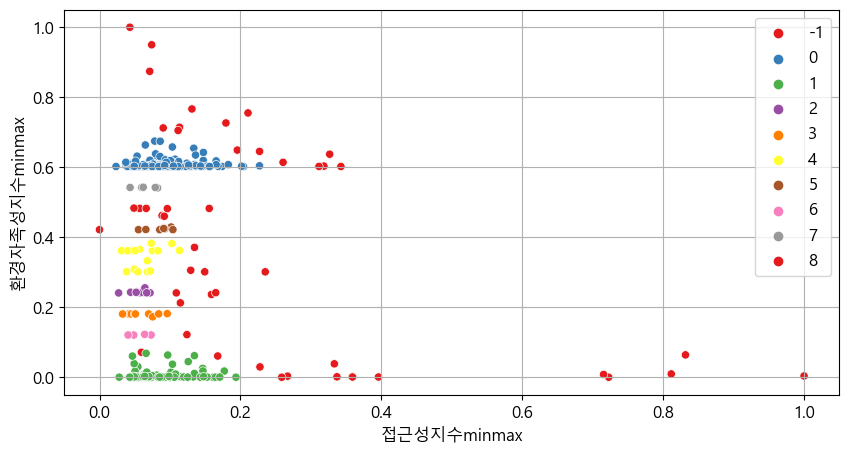

In [86]:
plt.figure(figsize=(10,5))
sb.scatterplot(data=origin5,x='접근성지수minmax',y='환경자족성지수minmax',hue=cluster_label2,palette='Set1')
plt.grid()
plt.show()
plt.close()

### 수동 voting을 위한 xlsx 파일 생

In [87]:
len(origin5[origin5['cluster_id']==-1])

42

In [88]:
origin5_final=DataFrame(origin5[origin5['cluster_id']==-1])
origin5_final.head()

,읍면동명,환경자족성지수minmax,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax,cluster_id
0,청운효자동,0.212495,0.002648,0.068435,0.114798,-1
1,사직동,0.038269,0.006464,0.041923,0.333275,-1
2,삼청동,0.602143,0.005332,0.090426,0.342620,-1
7,가회동,0.003047,0.003559,0.078064,0.266902,-1
8,종로1.2.3.4가동,0.063833,0.069040,0.206536,0.831703,-1


In [89]:
# origin5_final.to_excel('./교집합결과/접근성지수,환경자족성지수voting2.xlsx')

## #4. `여가생활지수 - 사회적약자지수`

### 변수 추출

In [90]:
origin2.head()

,읍면동명,환경자족성지수minmax,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax
0,청운효자동,0.212495,0.002648,0.068435,0.114798
1,사직동,0.038269,0.006464,0.041923,0.333275
2,삼청동,0.602143,0.005332,0.090426,0.342620
3,부암동,0.602143,0.001699,0.067935,0.157400
4,평창동,0.602861,0.000529,0.073234,0.135935


In [91]:
origin6=origin2.copy()
XX = origin6.iloc[:,[2,3]].values #x값으로 여가생활지수,사회적약자지수 지정
XX[:5]

array([[0.00264752, 0.06843491],
       [0.00646393, 0.04192329],
       [0.00533217, 0.09042634],
       [0.0016987 , 0.06793525],
       [0.00052877, 0.0732343 ]])

### DBSCAN 모델 구축

DBSCAN 구현 파라미터

| 파라미터 | 설명 |
| -- | -- |
| `eps` | 하나의 샘플에 대한 다른 샘플과의 최대 거리 |
| `min_samples` | MinPts. 핵심 포인트로 간주할 포인트에 대한 이웃의 샘플 수 |

In [92]:
dbscan3=DBSCAN(eps=0.03,min_samples=5,leaf_size=10,metric='chebyshev')
dbscan3.fit(XX)

DBSCAN(eps=0.03, leaf_size=10, metric='chebyshev')

### 군집 결과

In [93]:
cluster_label3=dbscan3.labels_
cluster_label3

array([ 0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0, -1,  0,  0,  0,  0,
       -1, -1, -1,  0,  0, -1, -1, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

### 군집 결과 데이터 통합

In [94]:
origin6['cluster_id'] = cluster_label3
origin6.head()

,읍면동명,환경자족성지수minmax,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax,cluster_id
0,청운효자동,0.212495,0.002648,0.068435,0.114798,0
1,사직동,0.038269,0.006464,0.041923,0.333275,0
2,삼청동,0.602143,0.005332,0.090426,0.342620,0
3,부암동,0.602143,0.001699,0.067935,0.157400,0
4,평창동,0.602861,0.000529,0.073234,0.135935,0


### 군집 결과 시각화

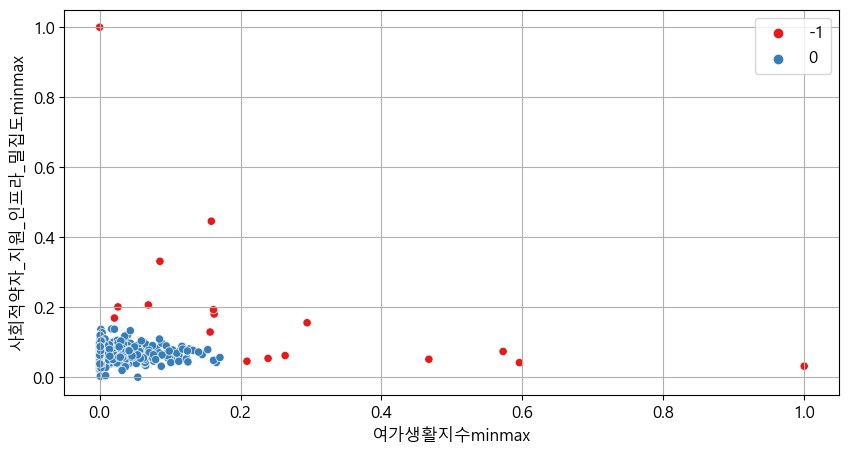

In [95]:
plt.figure(figsize=(10,5))
sb.scatterplot(data=origin6,x='여가생활지수minmax',y='사회적약자_지원_인프라_밀집도minmax',hue=cluster_label3,palette='Set1')
plt.grid()
plt.show()
plt.close()

> 여기서는 이상치(`군집 -1`)를  선정한다. <br/> 분석의 척도가 될 지수가 긍정적인 장소를 추출해 시범 사업지로 선정할 계획.

### 수동 voting을 위한 xlsx 파일 생성

In [96]:
origin6_final=DataFrame(origin6[origin6['cluster_id']==-1])
origin6_final.head()

,읍면동명,환경자족성지수minmax,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax,cluster_id
8,종로1.2.3.4가동,0.063833,0.069040,0.206536,0.831703,-1
9,종로5.6가동,0.000617,0.162506,0.180645,0.395959,-1
12,창신제1동,0.000000,0.263260,0.061943,0.161153,-1
17,소공동,0.009355,0.085553,0.331262,0.811509,-1
18,회현동,0.000000,0.294433,0.155671,0.722658,-1


In [97]:
# origin6_final.to_excel('./교집합결과/여가생활,사회적약자voting2.xlsx')

## #5. `여가생활지수 - 접근성지수`

### 변수 추출

In [98]:
origin2.head()

,읍면동명,환경자족성지수minmax,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax
0,청운효자동,0.212495,0.002648,0.068435,0.114798
1,사직동,0.038269,0.006464,0.041923,0.333275
2,삼청동,0.602143,0.005332,0.090426,0.342620
3,부암동,0.602143,0.001699,0.067935,0.157400
4,평창동,0.602861,0.000529,0.073234,0.135935


In [99]:
origin7=origin2.copy()
YY = origin7.iloc[:,[2,4]].values #x값으로 여가생활지수,접근성지수 지정
YY[:5]

array([[0.00264752, 0.11479751],
       [0.00646393, 0.33327467],
       [0.00533217, 0.34262014],
       [0.0016987 , 0.15739974],
       [0.00052877, 0.13593454]])

### DBSCAN 모델 구축

DBSCAN 구현 파라미터

| 파라미터 | 설명 |
| -- | -- |
| `eps` | 하나의 샘플에 대한 다른 샘플과의 최대 거리 |
| `min_samples` | MinPts. 핵심 포인트로 간주할 포인트에 대한 이웃의 샘플 수 |

In [100]:
dbscan4=DBSCAN(eps=0.03,min_samples=5,leaf_size=10,metric='chebyshev')
dbscan4.fit(YY)

DBSCAN(eps=0.03, leaf_size=10, metric='chebyshev')

### 군집 결과

In [101]:
cluster_label4=dbscan4.labels_
cluster_label4

array([ 0, -1, -1,  0,  0,  0,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0,  0,
       -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,
       -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

### 군집 결과 데이터 통합

In [102]:
origin7['cluster_id'] = cluster_label4
origin7.head()

,읍면동명,환경자족성지수minmax,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax,cluster_id
0,청운효자동,0.212495,0.002648,0.068435,0.114798,0
1,사직동,0.038269,0.006464,0.041923,0.333275,-1
2,삼청동,0.602143,0.005332,0.090426,0.342620,-1
3,부암동,0.602143,0.001699,0.067935,0.157400,0
4,평창동,0.602861,0.000529,0.073234,0.135935,0


### 군집 결과 시각화

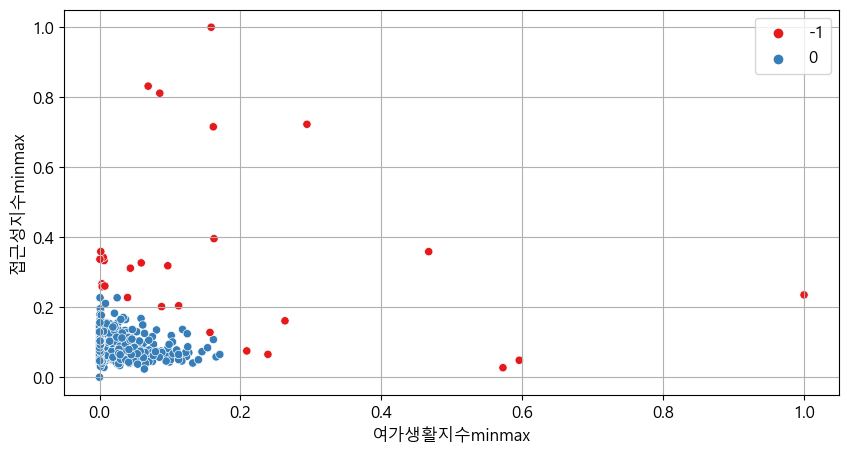

In [103]:
plt.figure(figsize=(10,5))
sb.scatterplot(data=origin7,x='여가생활지수minmax',y='접근성지수minmax',hue=cluster_label4,palette='Set1')
plt.grid()
plt.show()
plt.close()

> 여기서는 이상치(`군집 -1`)를  선정한다. <br/> 비록 데이터가 산개되어 있지만 군집 `0`보다 각 지수 값이 보다 상위에 포진해있는 만큼 최적의 입지 후보군이 될 수 있다고 판단.

### 수동 voting을 위한 xlsx 파일 생성

In [104]:
origin7_1final=DataFrame(origin7[origin7['cluster_id']==-1])
origin7_1final.head()

,읍면동명,환경자족성지수minmax,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax,cluster_id
1,사직동,0.038269,0.006464,0.041923,0.333275,-1
2,삼청동,0.602143,0.005332,0.090426,0.342620,-1
7,가회동,0.003047,0.003559,0.078064,0.266902,-1
8,종로1.2.3.4가동,0.063833,0.069040,0.206536,0.831703,-1
9,종로5.6가동,0.000617,0.162506,0.180645,0.395959,-1


In [105]:
# origin7_1final.to_excel('./교집합결과/여가생활,접근성지수voting2.xlsx')

## #6. `사회적약자지수 - 접근성지수`

### 변수 추출

In [106]:
origin2.head()

,읍면동명,환경자족성지수minmax,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax
0,청운효자동,0.212495,0.002648,0.068435,0.114798
1,사직동,0.038269,0.006464,0.041923,0.333275
2,삼청동,0.602143,0.005332,0.090426,0.342620
3,부암동,0.602143,0.001699,0.067935,0.157400
4,평창동,0.602861,0.000529,0.073234,0.135935


In [107]:
origin8=origin2.copy()
ZZ = origin8.iloc[:,[3,4]].values #x값으로 사회적약자지수, 접근성지수 지정
ZZ[:5]

array([[0.06843491, 0.11479751],
       [0.04192329, 0.33327467],
       [0.09042634, 0.34262014],
       [0.06793525, 0.15739974],
       [0.0732343 , 0.13593454]])

### DBSCAN 모델 구축

DBSCAN 구현 파라미터

| 파라미터 | 설명 |
| -- | -- |
| `eps` | 하나의 샘플에 대한 다른 샘플과의 최대 거리 |
| `min_samples` | MinPts. 핵심 포인트로 간주할 포인트에 대한 이웃의 샘플 수 |

In [108]:
dbscan5=DBSCAN(eps=0.03,min_samples=5,leaf_size=10,metric='chebyshev')
dbscan5.fit(ZZ)

DBSCAN(eps=0.03, leaf_size=10, metric='chebyshev')

### 군집 결과

In [109]:
cluster_label5=dbscan5.labels_
cluster_label5

array([ 0, -1,  1,  0,  0,  0,  0, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,
       -1, -1, -1,  1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

### 군집 결과 데이터 통합

In [110]:
origin8['cluster_id'] = cluster_label5
origin8

,읍면동명,환경자족성지수minmax,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax,cluster_id
0,청운효자동,0.212495,0.002648,0.068435,0.114798,0
1,사직동,0.038269,0.006464,0.041923,0.333275,-1
2,삼청동,0.602143,0.005332,0.090426,0.342620,1
3,부암동,0.602143,0.001699,0.067935,0.157400,0
4,평창동,0.602861,0.000529,0.073234,0.135935,0
...,...,...,...,...,...,...
400,성내제2동,0.240970,0.045969,0.060776,0.108987,0
401,성내제3동,0.542149,0.041755,0.075533,0.079180,0
402,길동,0.002587,0.029283,0.057210,0.064183,0
403,둔촌제1동,0.421500,0.000000,1.000000,0.000000,-1


### 군집 결과 시각화

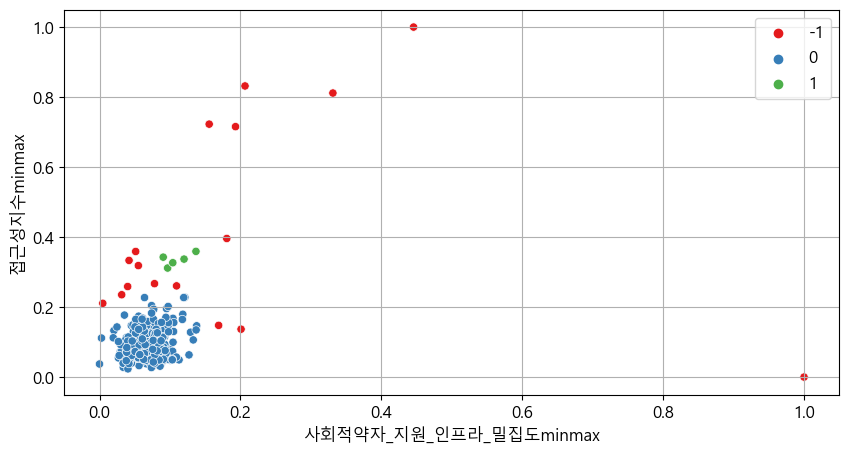

In [111]:
plt.figure(figsize=(10,5))
sb.scatterplot(data=origin8,x='사회적약자_지원_인프라_밀집도minmax',y='접근성지수minmax',hue=cluster_label5,palette='Set1')
plt.grid()
plt.show()
plt.close()

> 여기서는 이상치(`군집 -1`)를  선정한다. <br/> 비록 데이터가 산개되어 있지만 군집 `0`보다 각 지수 값이 보다 상위에 포진해있는 만큼 최적의 입지 후보군이 될 수 있다고 판단.

### 수동 voting을 위한 xlsx 파일 생성

In [112]:
origin8_final=DataFrame(origin8[origin8['cluster_id']==-1])
origin8_final.head()

,읍면동명,환경자족성지수minmax,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax,cluster_id
1,사직동,0.038269,0.006464,0.041923,0.333275,-1
7,가회동,0.003047,0.003559,0.078064,0.266902,-1
8,종로1.2.3.4가동,0.063833,0.069040,0.206536,0.831703,-1
9,종로5.6가동,0.000617,0.162506,0.180645,0.395959,-1
17,소공동,0.009355,0.085553,0.331262,0.811509,-1


In [113]:
# origin8_final.to_excel('./교집합결과/사회적약자,접근성지수voting2.xlsx')

> - DBSCAN의 경우 이상치에 민감하다.
> - 파라미터를 전부 같은 값으로 설정하고 군집모델을 실행했을 때 <br/> 일부는 적절하게 분리가 됐지만 일부는 한 개의 군집만 판별하고 나머지는 전부 이상치로 판단하였다.
> - 이상치라 하더라도 데이터 분석 결과 군집이 특정 지역에 몰려있거나 두 지수 모두 하위권에 분포할 경우, `두 지수중 하나라도 상위권에 분포한 이상치를 후보군으로 선정` 한다. <br/> ==> 적절한 데이터(군집)으로 판단한다.
>    - 이유는 `어떤 한 지수라도 높아야 보행일상권 대상에 포함이 되기 때문`
> - 결론적으로 KMeans로 추출한 `행정동과 DBSCAN으로 추출한 지수가 높은 행정동을 비교`해 `지수가 높은 행정동을 중심으로 최적의 입지 후보지라고 판단`.